# Problema do Controle de Estoque

## Equação de Bellman

$$ v^*_{t} = \max_{x_t \in X_t(s_t)} E 
\left[ 
    r_t(s_t, x_t, W_t) + v^*_{t+1}(S_{t+1})
\right] $$

$$t \in [0, T-1], \forall s_t \in \mathbf{S}$$

### Condições de contorno

$v^*_{T} = r_T (s_T), \forall s_T \in \mathbf{S} $

**Política Ótima:** $\pi^*= \{ \mu^*_0, ..., \mu^*_{T-1} \}$

$ \mu^*_t(s_t) = x^*_t $

## Importando Pacotes

In [1]:
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt

## Definindo parâmetros

In [2]:
## Obtenção de uma política ótima para o problema de controle de estoques

T = 10                                 ## Número de estágios/épocas de decisão
n = 3                                  ## Capacidade do armazém de estoques
S = list(range(0,n+1))                 ## Espaço de estados
r = 4                                  ## Preço de venda do produto
c = 2                                  ## Custo de aquisição do produto
h = 0.5                                ## Custo de manter estoques

vetor_demandas = np.array([0,1,2])                      ## Valores possíveis da demanda
probs_demandas = np.array([1/4, 1/2, 1/4])              ## Dist. de probabilidades da demanda

In [3]:
## Função de transição de estado
def transicao(s,x,d):
    return np.maximum(s+x-d, 0)

## Função recompensa
def recompensa(s,x,d):
    return r*np.minimum(s+x,d)-c*x-h*np.maximum(s+x-d, 0)


In [4]:
## Lista com funções de valor para cada estágio
funcoes_valor_ótimas = np.zeros((T+1, len(S)))    ## Matriz cuja linha é a função de valor no tempo t
## Lista com políticas ótimas para cada estágio
pol_ótimas = np.zeros((T, len(S)), dtype="int")

## Cálculo no estágio final (não há decisão)
v_residual = np.array([-h*s for s in S])

## Guarda o valor residual em funcoes_valor_ótimas
funcoes_valor_ótimas[T] = v_residual

In [5]:
## Loop do estágio T-1 até o estágio 0
for t in reversed(range(0,T)):

    v_otima_t = np.zeros(len(S))
    pol_otima = np.zeros(len(S))

    ## Loop de estados
    for s in S:

        ## Geração conjunto de decisões viáveis
        Xs = list(range(0, n-s+1))
        
        ## Valor da melhor decisão
        valor_melhor_decisao = -np.inf
        
        ## Loop do conjunto de decisões viáveis
        for x in Xs:

            valor_esperado_decisao = 0

            for j in range(len(vetor_demandas)):

                demanda = vetor_demandas[j]
                
                rt = recompensa(s,x,demanda)         ## Recompensa no tempo t
                s_proximo = transicao(s,x,demanda)   ## Estado s_t+1
                valor_s_proximo = funcoes_valor_ótimas[t+1,s_proximo]   ## Valor estado s_t+1

                valor_esperado_decisao+=(rt+valor_s_proximo)*probs_demandas[j]

            if valor_esperado_decisao > valor_melhor_decisao:

                valor_melhor_decisao = valor_esperado_decisao
                melhor_decisao = x
        
        v_otima_t[s] = valor_melhor_decisao
        pol_otima[s] = melhor_decisao

    funcoes_valor_ótimas[t] = v_otima_t
    pol_ótimas[t] = pol_otima



In [6]:
for t in range(0,T):
    print("Política ótima no tempo t = ", t, " = ", pol_ótimas[t])

for t in range(0,T+1):
    print("F Valor ótima em t = ", t, " = ", funcoes_valor_ótimas[t])


Política ótima no tempo t =  0  =  [2 1 0 0]
Política ótima no tempo t =  1  =  [2 1 0 0]
Política ótima no tempo t =  2  =  [2 1 0 0]
Política ótima no tempo t =  3  =  [2 1 0 0]
Política ótima no tempo t =  4  =  [2 1 0 0]
Política ótima no tempo t =  5  =  [2 1 0 0]
Política ótima no tempo t =  6  =  [2 1 0 0]
Política ótima no tempo t =  7  =  [2 1 0 0]
Política ótima no tempo t =  8  =  [1 0 0 0]
Política ótima no tempo t =  9  =  [1 0 0 0]
F Valor ótima em t =  0  =  [14.046875   16.046875   18.046875   19.38017654]
F Valor ótima em t =  1  =  [12.546875   14.546875   16.546875   17.88008118]
F Valor ótima em t =  2  =  [11.046875   13.046875   15.046875   16.37969971]
F Valor ótima em t =  3  =  [ 9.546875   11.546875   13.546875   14.87817383]
F Valor ótima em t =  4  =  [ 8.046875   10.046875   12.046875   13.37207031]
F Valor ótima em t =  5  =  [ 6.546875    8.546875   10.546875   11.84765625]
F Valor ótima em t =  6  =  [ 5.046875  7.046875  9.046875 10.25    ]
F Valor ótim

In [7]:
# Aplicação da política (simulação)

print("Simulação da política ótima")
rng = default_rng()    ## Gerador de números aleatórios

s = s0 = 0    ## Estado inicial

realizacao_estados = [s0]
realizacao_demandas = []
realizacao_decisoes = []


Simulação da política ótima


In [8]:

for t in range(T):

    ## Amostra a demanda no tempo t
    d = rng.choice(vetor_demandas, p = probs_demandas)

    print("Estado no tempo  t = ", t, " é ", d)

    realizacao_demandas.append(d)

    print("Demanda no tempo t = ", t, " é ", d)
    
    ## Toma decisão no tempo t em função do estado atual s
    x = pol_ótimas[t,s]

    realizacao_decisoes.append(x)

    print("Decisão no tempo t = ", t, " é ", x)

    ## Atualiza novo estado (função de transição de estados)
    s = transicao(s,x,d)

    ## Guarda novo estado
    realizacao_estados.append(s)



Estado no tempo  t =  0  é  1
Demanda no tempo t =  0  é  1
Decisão no tempo t =  0  é  2
Estado no tempo  t =  1  é  1
Demanda no tempo t =  1  é  1
Decisão no tempo t =  1  é  1
Estado no tempo  t =  2  é  2
Demanda no tempo t =  2  é  2
Decisão no tempo t =  2  é  1
Estado no tempo  t =  3  é  2
Demanda no tempo t =  3  é  2
Decisão no tempo t =  3  é  2
Estado no tempo  t =  4  é  0
Demanda no tempo t =  4  é  0
Decisão no tempo t =  4  é  2
Estado no tempo  t =  5  é  1
Demanda no tempo t =  5  é  1
Decisão no tempo t =  5  é  0
Estado no tempo  t =  6  é  0
Demanda no tempo t =  6  é  0
Decisão no tempo t =  6  é  1
Estado no tempo  t =  7  é  1
Demanda no tempo t =  7  é  1
Decisão no tempo t =  7  é  0
Estado no tempo  t =  8  é  1
Demanda no tempo t =  8  é  1
Decisão no tempo t =  8  é  0
Estado no tempo  t =  9  é  0
Demanda no tempo t =  9  é  0
Decisão no tempo t =  9  é  1


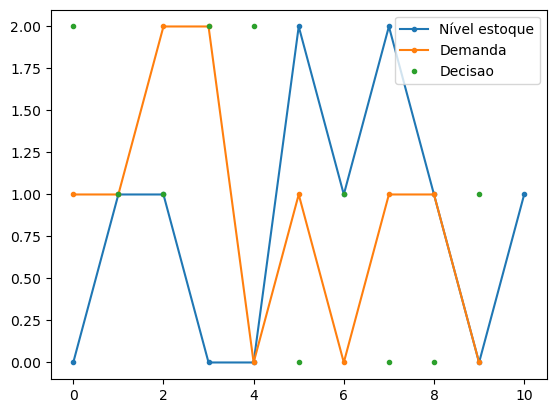

In [9]:

plt.plot(realizacao_estados,marker='.', label = "Nível estoque")
plt.plot(realizacao_demandas,marker='.', label = "Demanda")
plt.plot(realizacao_decisoes, ls="",marker='.', label = "Decisao")
plt.legend()